#### An example image containing a set of shapes that we are going to compute the center of the contour for.

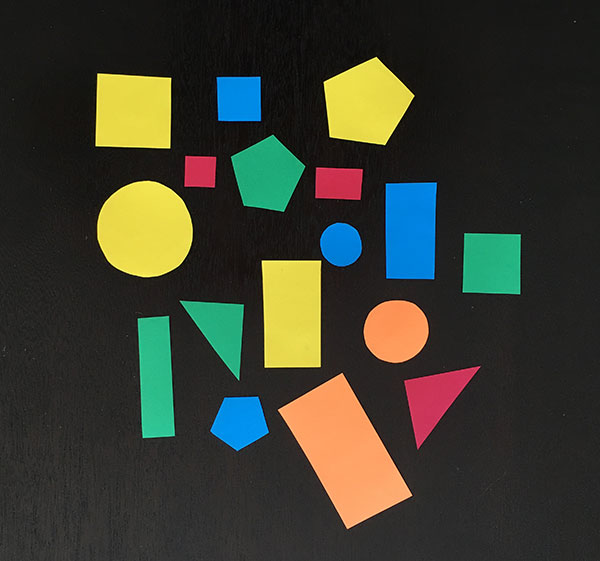

In [7]:
from IPython.display import Image 
Image(filename='data/shapes_and_colors.jpg')

#### Goal:
1. Detect outline of each shape.
2. Detecting the center of contour.(also called the centroid of the region.)

#### Steps needed to achieve our goal:
In order to accomplish these goals, we’ll need to perform a bit of image pre-processing, including:
1. Conversion to grayscale.
2. Blurring to reduce high frequency noise to make our contour detection process more accurate.
3. Binarization of the image. Typically edge detection and thresholding are used for this process. In this post, we’ll be applying thresholding.

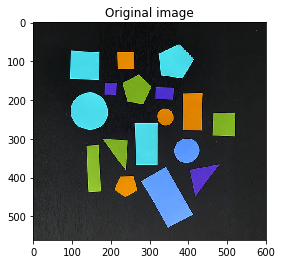

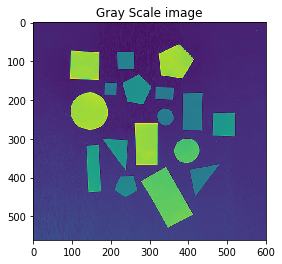

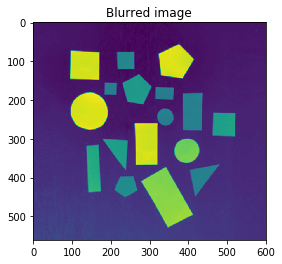

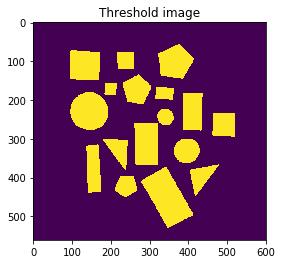

In [8]:
# import the necessary packages
from matplotlib import pyplot as plt
import imutils
import cv2

 
 
# load the image, convert it to grayscale, blur it slightly, and threshold it


image = cv2.imread('data/shapes_and_colors.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
plt.imshow(image)
plt.title('Original image')
plt.show()

plt.imshow(gray)
plt.title('Gray Scale image')
plt.show()

plt.imshow(blurred)
plt.title('Blurred image')
plt.show()

plt.imshow(thresh)
plt.title('Threshold image')
plt.show()



In [9]:
# We are now ready to process each of the contours:

# find contours in the thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]



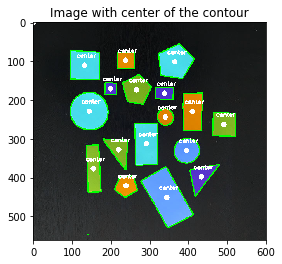

In [10]:
# loop over the contours
for c in cnts:
    # compute the center of the contour
    M = cv2.moments(c)
    if(int(M["m00"]) == 0):
        cX = 0
        cY = 0
    else:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])

    # draw the contour and center of the shape on the image
    cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
    cv2.circle(image, (cX, cY), 7, (255, 255, 255), -1)
    cv2.putText(image, "center", (cX - 20, cY - 20),
    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    # show the image
    #cv2.imshow("Image", image)
    #cv2.waitKey(0)
    
# show the image in jupyter notebook
plt.imshow(image)
plt.title('Image with center of the contour')
plt.show()

    